In [42]:
import pandas as pd

In [43]:
# Load the data into a DataFrame 
df_orig = pd.read_csv('mock_fashion_data_uk_us.csv')
df = pd.read_csv('mock_fashion_data_uk_us.csv')

In [44]:
df.dtypes

Product Name                     object
Price                           float64
Brand                            object
Category                         object
Description                      object
Rating                          float64
Review Count                      int64
Style Attributes                 object
Total Sizes                      object
Available Sizes                  object
Color                            object
Purchase History                 object
Age                               int64
Fashion Magazines                object
Fashion Influencers              object
Season                           object
Time Period Highest Purchase     object
Customer Reviews                 object
Social Media Comments            object
feedback                         object
dtype: object

In [45]:
print(df['Description'].unique())
print(df['Style Attributes'].unique())
print(df['Season'].unique())

['Bad' 'Not Good' 'Very Bad' 'Very Good' 'Best' 'Good' 'Worst']
['Streetwear' 'Vintage' 'Formal' 'Sporty' 'Edgy' 'Minimalist' 'Preppy'
 'Glamorous' 'Casual' 'Bohemian']
['Fall/Winter' 'Winter' 'Summer' 'Spring' 'Spring/Summer' 'Fall']


In [46]:
# Define the columns to drop
columns_to_drop = ['Social Media Comments', 'Fashion Influencers', 'Fashion Magazines', 'feedback', 'Product Name']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

df

,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Season,Time Period Highest Purchase,Customer Reviews
0,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Fall/Winter,Daytime,Mixed
1,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Winter,Weekend,Negative
2,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Summer,Nighttime,Unknown
3,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Fall/Winter,Weekend,Neutral
4,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Spring,Daytime,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16.255998,Mulberry,Accessories,Best,3.534252,312,Vintage,"S, L, XL",XL,Green,Very High,37,Winter,Holiday,Positive
999996,78.555545,Mulberry,Activewear,Best,1.896160,68,Casual,"S, M, L",L,Red,Average,52,Spring,Evening,Unknown
999997,34.379639,Mulberry,Tops,Not Good,3.168064,237,Casual,"S, M, L",M,Red,High,25,Summer,Evening,Neutral
999998,62.343618,Ralph Lauren,Tops,Best,4.764673,53,Sporty,"M, L, XL",S,Red,Above Average,29,Spring/Summer,Evening,Positive


In [47]:
# Drop all NaN values if any
df.dropna(inplace=True)

In [48]:
# Check if any NaN values are still present
df.isnull().sum()

Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
dtype: int64

In [49]:
print(df['Description'].unique())
print(df['Style Attributes'].unique())
print(df['Season'].unique())

['Bad' 'Not Good' 'Very Bad' 'Very Good' 'Best' 'Good' 'Worst']
['Streetwear' 'Vintage' 'Formal' 'Sporty' 'Edgy' 'Minimalist' 'Preppy'
 'Glamorous' 'Casual' 'Bohemian']
['Fall/Winter' 'Winter' 'Summer' 'Spring' 'Spring/Summer' 'Fall']


In [50]:
# Normalizing the rating column
df['Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min()) * 5

In [51]:
df_spring = df[df.Season == 'Spring'].reset_index()

In [52]:
df_spring.drop(columns=['Season'], inplace=True)

In [53]:
# One-Hot encoding for categorial variables 
columns_to_encode = ['Description', 'Total Sizes', 'Available Sizes','Brand', 'Category', 'Color', 'Purchase History', 'Time Period Highest Purchase', 'Customer Reviews']
# Perform one-hot encoding using pd.get_dummies
df_spring_1 = pd.get_dummies(df_spring, columns=columns_to_encode)

# Encode the Stye Attributes to integer label, like 0, 1, 2, 3 ...
style_encode = {
    'Sporty': 0, 
    'Streetwear': 1, 
    'Bohemian': 2, 
    'Minimalist': 3, 
    'Formal': 4,
    'Glamorous': 5, 
    'Casual':6, 
    'Edgy': 7, 
    'Preppy': 8, 
    'Vintage': 9}

df_spring_1['Style Attributes'] = df_spring_1['Style Attributes'].apply(lambda x: style_encode.get(x))


In [54]:
df_spring_1['Style Attributes'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## USING XGBOOST

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

In [56]:
# Get the x and y of the data
data_x = df_spring_1.drop(['Style Attributes'], axis=1)
data_y = df_spring_1['Style Attributes']

# Split the data to train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [57]:
data_y.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
# Build the model
params = {
    'n_estimators': 800,
    'learning_rate': 1e-1,
    'max_depth': 8,
    'num_class': 10,
    'random_state': 42,
    'nthread': 8,
    # 'silent': 2
    }

# eval_set = [(x_train, y_train), (x_test, y_test)]
eval_set = [(x_train, y_train)]
xgboost_clf = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=8, num_class=10, object='multi:softmax',
                            random_state=42, nthread=8)

In [60]:
xgboost_clf.fit(x_train, y_train, eval_set=[(x_train, y_train)], verbose=True)

[0]	validation_0-mlogloss:2.29820


/Users/ainateng/anaconda3/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "object" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-mlogloss:2.29411
[2]	validation_0-mlogloss:2.29032
[3]	validation_0-mlogloss:2.28638
[4]	validation_0-mlogloss:2.28276
[5]	validation_0-mlogloss:2.27882
[6]	validation_0-mlogloss:2.27557
[7]	validation_0-mlogloss:2.27185
[8]	validation_0-mlogloss:2.26840
[9]	validation_0-mlogloss:2.26486
[10]	validation_0-mlogloss:2.26114
[11]	validation_0-mlogloss:2.25786
[12]	validation_0-mlogloss:2.25445
[13]	validation_0-mlogloss:2.25116
[14]	validation_0-mlogloss:2.24815
[15]	validation_0-mlogloss:2.24460
[16]	validation_0-mlogloss:2.24184
[17]	validation_0-mlogloss:2.23839
[18]	validation_0-mlogloss:2.23558
[19]	validation_0-mlogloss:2.23210
[20]	validation_0-mlogloss:2.22899
[21]	validation_0-mlogloss:2.22638
[22]	validation_0-mlogloss:2.22316
[23]	validation_0-mlogloss:2.21984
[24]	validation_0-mlogloss:2.21652
[25]	validation_0-mlogloss:2.21371
[26]	validation_0-mlogloss:2.21049
[27]	validation_0-mlogloss:2.20760
[28]	validation_0-mlogloss:2.20427
[29]	validation_0-mlogloss:2.

[232]	validation_0-mlogloss:1.70490
[233]	validation_0-mlogloss:1.70275
[234]	validation_0-mlogloss:1.70107
[235]	validation_0-mlogloss:1.69903
[236]	validation_0-mlogloss:1.69700
[237]	validation_0-mlogloss:1.69536
[238]	validation_0-mlogloss:1.69316
[239]	validation_0-mlogloss:1.69103
[240]	validation_0-mlogloss:1.68910
[241]	validation_0-mlogloss:1.68704
[242]	validation_0-mlogloss:1.68491
[243]	validation_0-mlogloss:1.68263
[244]	validation_0-mlogloss:1.68077
[245]	validation_0-mlogloss:1.67873
[246]	validation_0-mlogloss:1.67645
[247]	validation_0-mlogloss:1.67473
[248]	validation_0-mlogloss:1.67259
[249]	validation_0-mlogloss:1.67046
[250]	validation_0-mlogloss:1.66846
[251]	validation_0-mlogloss:1.66666
[252]	validation_0-mlogloss:1.66493
[253]	validation_0-mlogloss:1.66278
[254]	validation_0-mlogloss:1.66034
[255]	validation_0-mlogloss:1.65822
[256]	validation_0-mlogloss:1.65605
[257]	validation_0-mlogloss:1.65379
[258]	validation_0-mlogloss:1.65147
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:1.31031
[461]	validation_0-mlogloss:1.30858
[462]	validation_0-mlogloss:1.30702
[463]	validation_0-mlogloss:1.30574
[464]	validation_0-mlogloss:1.30436
[465]	validation_0-mlogloss:1.30299
[466]	validation_0-mlogloss:1.30124
[467]	validation_0-mlogloss:1.30018
[468]	validation_0-mlogloss:1.29879
[469]	validation_0-mlogloss:1.29742
[470]	validation_0-mlogloss:1.29580
[471]	validation_0-mlogloss:1.29439
[472]	validation_0-mlogloss:1.29286
[473]	validation_0-mlogloss:1.29114
[474]	validation_0-mlogloss:1.28958
[475]	validation_0-mlogloss:1.28825
[476]	validation_0-mlogloss:1.28685
[477]	validation_0-mlogloss:1.28525
[478]	validation_0-mlogloss:1.28360
[479]	validation_0-mlogloss:1.28220
[480]	validation_0-mlogloss:1.28087
[481]	validation_0-mlogloss:1.27947
[482]	validation_0-mlogloss:1.27801
[483]	validation_0-mlogloss:1.27645
[484]	validation_0-mlogloss:1.27494
[485]	validation_0-mlogloss:1.27354
[486]	validation_0-mlogloss:1.27187
[487]	validation_0-mlogloss:

[688]	validation_0-mlogloss:1.00728
[689]	validation_0-mlogloss:1.00595
[690]	validation_0-mlogloss:1.00487
[691]	validation_0-mlogloss:1.00371
[692]	validation_0-mlogloss:1.00256
[693]	validation_0-mlogloss:1.00127
[694]	validation_0-mlogloss:1.00015
[695]	validation_0-mlogloss:0.99893
[696]	validation_0-mlogloss:0.99766
[697]	validation_0-mlogloss:0.99631
[698]	validation_0-mlogloss:0.99522
[699]	validation_0-mlogloss:0.99409
[700]	validation_0-mlogloss:0.99281
[701]	validation_0-mlogloss:0.99151
[702]	validation_0-mlogloss:0.99026
[703]	validation_0-mlogloss:0.98910
[704]	validation_0-mlogloss:0.98819
[705]	validation_0-mlogloss:0.98721
[706]	validation_0-mlogloss:0.98613
[707]	validation_0-mlogloss:0.98504
[708]	validation_0-mlogloss:0.98359
[709]	validation_0-mlogloss:0.98250
[710]	validation_0-mlogloss:0.98129
[711]	validation_0-mlogloss:0.98016
[712]	validation_0-mlogloss:0.97897
[713]	validation_0-mlogloss:0.97786
[714]	validation_0-mlogloss:0.97660
[715]	validation_0-mlogloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None, nthread=8,
              num_class=10, ...)

In [61]:
y_pred = xgboost_clf.predict(x_train)
y_pred[:50]

array([3, 4, 4, 4, 8, 1, 1, 9, 3, 2, 1, 4, 4, 4, 3, 4, 8, 9, 2, 5, 9, 4,
       0, 7, 3, 1, 9, 0, 0, 8, 8, 9, 2, 8, 8, 6, 1, 0, 4, 4, 0, 9, 5, 3,
       1, 7, 7, 0, 9, 6])

In [62]:
print(y_train.tolist()[:50])

[3, 4, 4, 4, 8, 1, 1, 9, 3, 2, 1, 4, 4, 4, 9, 4, 8, 9, 2, 5, 9, 4, 0, 7, 3, 1, 9, 0, 0, 8, 8, 9, 2, 8, 8, 1, 1, 0, 4, 4, 0, 9, 5, 3, 1, 7, 7, 0, 9, 6]


In [63]:
import numpy as np
num_correct = np.sum(y_pred == y_train.tolist())
print("The percentage of correct prediction: ", num_correct / len(y_pred))

The percentage of correct prediction:  0.9800707168113146


## DATA VISUALIZATION

1) What style of clothes to buy for the Spring Season

2) What category of style to buy for the Spring Season

In [64]:
import numpy as np

In [23]:
df_spring = df[df.Season == 'Spring'].reset_index()
df_spring

,index,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Season,Time Period Highest Purchase,Customer Reviews
0,4,31.633686,Tommy Hilfiger,Bottoms,Very Good,0.229053,55,Sporty,"M, L, XL",S,Green,Above Average,23,Spring,Daytime,Positive
1,16,70.580053,Ted Baker,Swimwear,Very Good,0.628472,454,Streetwear,"S, L, XL",S,Black,Very Low,39,Spring,Daytime,Unknown
2,21,66.428026,Calvin Klein,Outerwear,Not Good,4.946872,322,Sporty,"S, L, XL",S,Black,Below Average,28,Spring,Daytime,Neutral
3,30,64.645994,Ted Baker,Accessories,Good,4.507439,8,Bohemian,"S, L, XL",M,Red,Very High,28,Spring,Daytime,Unknown
4,35,57.257588,Calvin Klein,Bottoms,Very Good,4.699781,198,Bohemian,"M, L, XL",M,Green,Low,60,Spring,Weekend,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167212,999973,53.599796,Alexander McQueen,Footwear,Bad,1.150915,457,Formal,"S, L, XL",M,Black,Very High,45,Spring,Weekend,Negative
167213,999978,69.776439,Jigsaw,Outerwear,Not Good,1.360685,446,Bohemian,"S, L, XL",M,Black,Average,56,Spring,Nighttime,Unknown
167214,999985,63.168692,Ralph Lauren,Swimwear,Very Bad,0.880103,4,Bohemian,"S, M, L",S,Black,Above Average,53,Spring,Nighttime,Positive
167215,999993,25.330245,Mulberry,Footwear,Best,2.302789,461,Streetwear,"S, L, XL",L,Blue,Average,46,Spring,Evening,Unknown


In [65]:
df_spring['Style Attributes'].describe()

count      167217
unique         10
top       Vintage
freq        16892
Name: Style Attributes, dtype: object

In [66]:
style_counts = df_spring["Style Attributes"].value_counts()
print(style_counts)

Vintage       16892
Edgy          16887
Minimalist    16845
Streetwear    16775
Sporty        16726
Bohemian      16699
Preppy        16656
Casual        16615
Glamorous     16570
Formal        16552
Name: Style Attributes, dtype: int64


In [67]:
style_freq = df_spring["Style Attributes"].value_counts() / len(df_spring)
print(style_freq)

Vintage       0.101018
Edgy          0.100989
Minimalist    0.100737
Streetwear    0.100319
Sporty        0.100026
Bohemian      0.099864
Preppy        0.099607
Casual        0.099362
Glamorous     0.099093
Formal        0.098985
Name: Style Attributes, dtype: float64


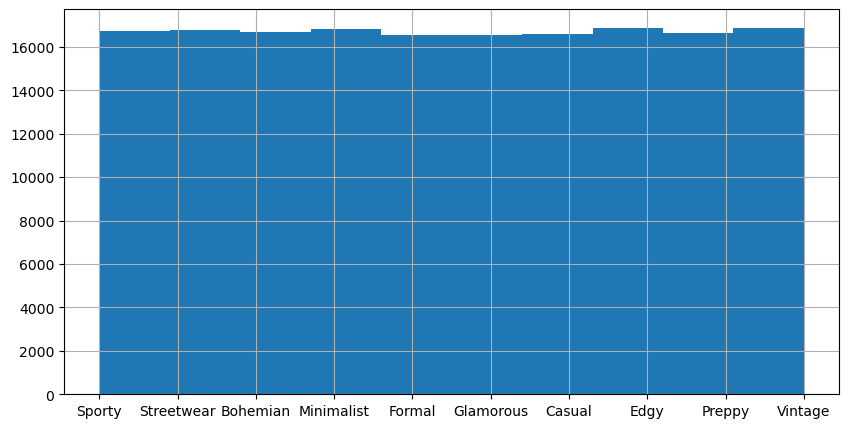

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = df_spring["Style Attributes"].hist(figsize=(10, 5))

Text(0, 0.5, '')

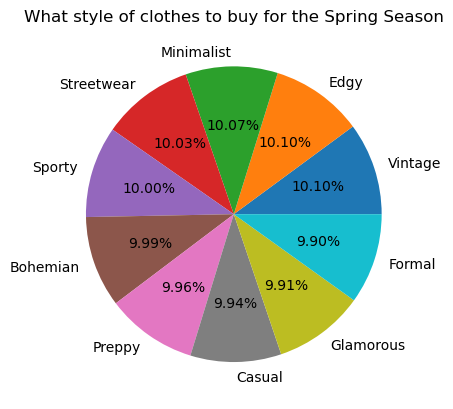

In [69]:
def label_function(val):
    return f'{val:.02f}%'

fig, ax = plt.subplots()
df_spring['Style Attributes'].value_counts().plot(kind='pie', autopct=label_function)
ax.set_title('What style of clothes to buy for the Spring Season')
ax.set_ylabel('')

In [70]:
df_spring['Category'].describe()

count          167217
unique             10
top       Accessories
freq            16842
Name: Category, dtype: object

In [71]:
df_spring['Category'].unique()

array(['Bottoms', 'Swimwear', 'Outerwear', 'Accessories', 'Tops',
       'Footwear', 'Lingerie', 'Jewelry', 'Dresses', 'Activewear'],
      dtype=object)

In [72]:
category_counts = df_spring["Category"].value_counts()
print(category_counts)

Accessories    16842
Outerwear      16837
Footwear       16782
Activewear     16757
Lingerie       16736
Tops           16725
Jewelry        16683
Swimwear       16633
Bottoms        16613
Dresses        16609
Name: Category, dtype: int64


In [73]:
style_freq = df_spring["Category"].value_counts() / len(df_spring)
print(style_freq)

Accessories    0.100719
Outerwear      0.100690
Footwear       0.100361
Activewear     0.100211
Lingerie       0.100086
Tops           0.100020
Jewelry        0.099769
Swimwear       0.099470
Bottoms        0.099350
Dresses        0.099326
Name: Category, dtype: float64


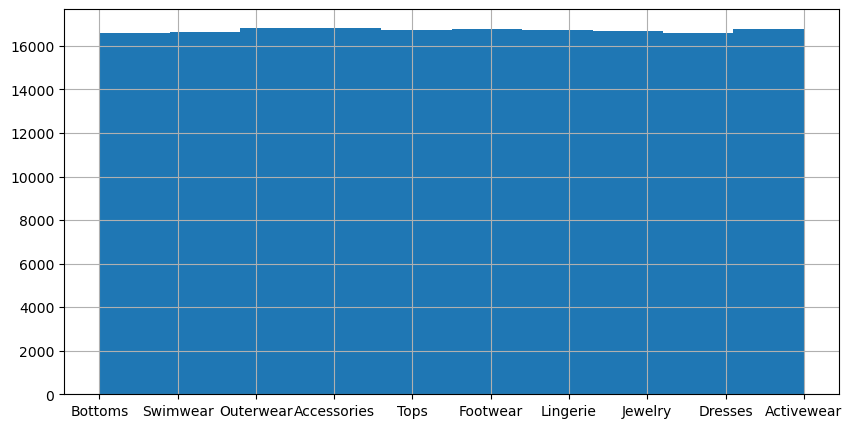

In [74]:
fig = df_spring["Category"].hist(figsize=(10, 5))

Text(0, 0.5, '')

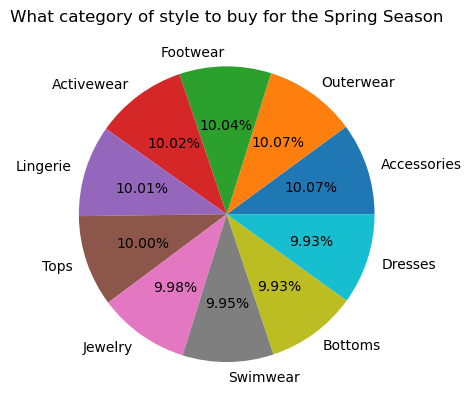

In [75]:
def label_function(val):
    return f'{val:.02f}%'

fig, ax = plt.subplots()
df_spring['Category'].value_counts().plot(kind='pie', autopct=label_function)
ax.set_title('What category of style to buy for the Spring Season')
ax.set_ylabel('')